<a href="https://colab.research.google.com/github/uyoung-jeong/2020_deep_learning_study/blob/master/SteepestDescent_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.datasets import make_regression

In [0]:
class Optim():
  def __init__(self, init_x=[2.0, 0.001], objective='rosenbrock'):
    self.X, self.Y, self.n_samples = None, None, None
    if objective=='lr_mse':
      print('making linear regression dataset')
      self.n_samples = 50
      coef = torch.rand(1)*10
      print('gt w: {}'.format(coef))
      noise=5.0
      self.X = torch.arange(1,1+self.n_samples, dtype=torch.float).unsqueeze(dim=1)
      self.X += torch.randn(self.n_samples).unsqueeze(dim=1)
      self.Y = coef * self.X + torch.randn(self.n_samples).unsqueeze(dim=1) * noise
      
      # normalize
      #self.X /= np.linalg.norm(self.X)
      #self.Y /= np.linalg.norm(self.Y)
      
      # format conversion
      self.X = torch.tensor(self.X)
      self.Y = torch.tensor(self.Y)

    self.objectives = {'lr_mse':self.lr_mse, 'l2': self.l2, 'rosenbrock': self.rosenbrock}
    self.differentials = {'lr_mse':self.dlr_mse, 'l2': self.dl2, 'rosenbrock': self.drosenbrock}
    self.objective_name = objective
    self.obj_fn = self.objectives[objective]
    self.diff_fn = self.differentials[objective]

    self.x = torch.tensor(init_x)
    self.y = self.obj_fn(self.x)
    print('x:{}, y:{}'.format(self.x,self.y))

  def lr_mse(self,w):
    x = self.X
    y = self.Y
    return 1/self.n_samples * torch.sum((y-w*x)**2).float()

  def dlr_mse(self,w):
    x = self.X
    y = self.Y
    return torch.Tensor([""" Implement here """])

  def l2(self,x):
    return (x-1)**2+2

  def dl2(self,x):
    return torch.Tensor(""" Implement here """)

  # only allow two scalar values
  def rosenbrock(self, t):
    x,y = t
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

  def drosenbrock(self, t):
      x, y = t
      return torch.Tensor(""" Implement here """)

  def linesearch_backtrack(self, alpha, dest_vec, grad, max_iter=1000):
    iterEndCond = 0
    c = 0.49
    tau = 0.95
    it = 0

    original_x = self.x
    original_y = self.y
    while iterEndCond != 1 and it < max_iter:
      x_cand = self.x + alpha * dest_vec
      y_cand = self.obj_fn(x_cand)
      #print('self.y:{}, grad:{}, dest_vec:{}'.format(self.y, grad, dest_vec))
      #print('y_cand: {}, endCond: {}'.format(y_cand, self.y + c*alpha*torch.matmul(grad,dest_vec)))
      if y_cand <= self.y + c*alpha*torch.matmul(grad,dest_vec):
        #print('end condition enabled')
        #print('self.y:{}, grad:{}, dest_vec:{}'.format(self.y, grad, dest_vec))
        #print('y_cand: {}, endCond: {}'.format(y_cand, self.y + c*alpha*torch.matmul(grad,dest_vec)))
        iterEndCond = 1
      else:
        alpha = alpha * tau
        it += 1
    return alpha

  # steepest descent
  def steepest_descent(self, max_iter=1000):
    new_x = self.x.detach().numpy()
    it = 0
    iterEndCond = 0
    grad_norm_ratio = 1e-7
    init_alpha = 0.9
    # get gradient
    grad = self.diff_fn(self.x)
    init_grad_norm = torch.norm(grad)
    dest_vec = torch.mul(-1, grad)

    optim_history = []
    optim_history.append([self.x.clone().numpy(), self.y.clone().numpy(), init_alpha])
    while iterEndCond != 1 and it < max_iter:
      alpha = self.linesearch_backtrack(init_alpha, dest_vec, grad)
      #alpha = 0.0015
      self.x += alpha * dest_vec
      self.y = self.obj_fn(self.x)

      grad = self.diff_fn(self.x)
      dest_vec = """ Implement here """
      grad_norm = torch.norm(grad)
      if grad_norm <=0 or it >= max_iter:
        iterEndCond = 1
      elif grad_norm/init_grad_norm < grad_norm_ratio:
        print('terminate early due to low grad norm ratio')
        iterEndCond = 1
      else:
        if it % 100 == 0:
          print('iteration: {}, x: {}, y: {}, alpha: {}'.format(it, self.x.numpy(), self.y.numpy(), alpha))
        optim_history.append([self.x.clone().numpy(), self.y.clone().numpy(), alpha])
        it += 1
    print('\nfinished')

    return self.x.numpy(), self.y.numpy(), optim_history, it

In [0]:
obj = Optim(init_x=[2.0, 0.001], objective='rosenbrock')
#obj = Optim(init_x=[3.0], objective='l2')
#obj = Optim(init_x=[0.1], objective='lr_mse')
x_star, y_star, hist, iteration = obj.steepest_descent()

x:tensor([2.0000e+00, 1.0000e-03]), y:1600.2001953125
iteration: 0, x: [1.1292671  0.21854722], y: 111.67753601074219, alpha: 0.00027200202988304306
iteration: 100, x: [0.9430651 0.8894943], y: 0.0032430824358016253, alpha: 0.010379971702805722
iteration: 200, x: [0.95610815 0.91423225], y: 0.0019272947683930397, alpha: 0.009860973117665435
iteration: 300, x: [0.96669984 0.9346074 ], y: 0.0011098773684352636, alpha: 0.012743882202015912
iteration: 400, x: [0.97485894 0.9504197 ], y: 0.0006325600552372634, alpha: 0.012106688091915117
iteration: 500, x: [0.98039633 0.96123123], y: 0.00038459806819446385, alpha: 0.012106688091915117
iteration: 600, x: [0.9891679  0.97846067], y: 0.00011733931751223281, alpha: 0.0065419710386514516
iteration: 700, x: [0.9916029 0.9833052], y: 7.059489871608093e-05, alpha: 0.014863836946512221
iteration: 800, x: [0.99413    0.98831165], y: 3.448618736001663e-05, alpha: 0.012743882202015912
iteration: 900, x: [0.99584216 0.99172056], y: 1.7323571228189394e-0

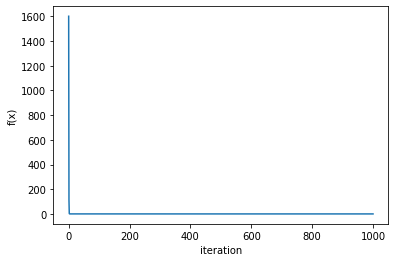

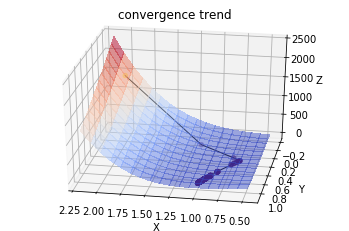

total iteration: 1000
optim_x: [0.9979902  0.99597555], optim_y: 4.0472200453223195e-06


In [0]:
x_hist = [e[0] for e in hist]
y_hist = [e[1] for e in hist]
a_hist = [e[2] for e in hist]

# plot trend of y change
x_plot_data = range(len(y_hist))
plt.plot(x_plot_data, y_hist)
plt.ylabel('f(x)')
plt.xlabel('iteration')
plt.show()

"""
# alpha change trend plotting
plt.plot(x_plot_data, a_hist)
plt.xlabel('iteration')
plt.ylabel('alpha')
plt.show()
"""

if obj.objective_name == 'lr_mse':
  plt.scatter(obj.X, obj.Y) # show original data
  plt.plot(obj.X, obj.x*obj.X, c='red') # use solution
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.show()

  solution, residuals, rank, singular = np.linalg.lstsq(obj.X, obj.Y)
  print('numpy solution: {}'.format(solution))
  print('numpy error: {}'.format(residuals))

# 2D plot of convergence
if len(x_hist[0]) == 1 and obj.objective_name=='l2':
  fig = plt.figure()
  ax = fig.gca()
  xmin, xmax = np.amin(x_hist), np.amax(x_hist)
  X = np.arange(xmin-0.4, xmax+0.1, 0.02)
  Y = obj.obj_fn(X)
  ax.plot(X,Y, label='objective function')
  ax.scatter(x_hist, y_hist, c='b')
  ax.plot(x_hist, y_hist, c='k', linewidth=1)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  #ax.set_xlim(0.95, 1.1)
  #ax.set_ylim(1.0, 3)
  ax.legend()
  plt.show()

# 3D plot
if len(x_hist[0]) > 1:
  x1_hist = np.array([e[0] for e in x_hist])
  x2_hist = np.array([e[1] for e in x_hist])
  y_hist = np.array(y_hist)
  x1_min, x1_max = np.amin(x1_hist), np.amax(x1_hist)
  x2_min, x2_max = np.amin(x2_hist), np.amax(x2_hist)

  fig = plt.figure()
  ax = fig.gca(projection='3d')
  
  # 3d mesh data
  X = np.arange(x1_min-0.2, x1_max+0.2, 0.1)
  Y = np.arange(x2_min-0.2, x2_max+0.2, 0.1)
  X, Y = np.meshgrid(X, Y)
  row_num = X.shape[0]
  col_num = X.shape[1]
  Z = np.zeros(X.shape)
  for r in range(row_num):
    for c in range(col_num):
      Z[r,c] = obj.obj_fn([X[r,c],Y[r,c]])
  surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.5, linewidth=0, antialiased=False)

  ax.plot3D(x1_hist, x2_hist, y_hist, label='parametric curve', c='k', linewidth=1)
  ax.scatter3D(x1_hist, x2_hist, y_hist, c=y_hist, label='parametric curve') # c='g'
  #ax.set_xlim(0, 2)
  #ax.set_ylim(0, 2)
  #ax.set_zlim(0, 2)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  #ax.legend()
  plt.title('convergence trend')

  ax.view_init(elev=30., azim=100)
  plt.show()

print('total iteration: {}'.format(iteration))
print('optim_x: {}, optim_y: {}'.format(x_star, y_star))